In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns

In [2]:
from net_analysis import *

In [3]:
path = "../Dataset FFF/edges.csv"

In [4]:
path_graph = "../Dataset FFF/Graph_data/"

In [5]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10361
Number of edges: 63960
Average degree:  12.3463


In [7]:
ws_G = nx.watts_strogatz_graph(G.number_of_nodes(), k=12, p=0.1, seed = 42)
print("Nodes:",ws_G.number_of_nodes())
print("Edges:",ws_G.number_of_edges())

Nodes: 10361
Edges: 62166


In [8]:
nx.write_graphml(ws_G, path_graph+"WS_Network.graphml")

# 1 - Degree Distribution

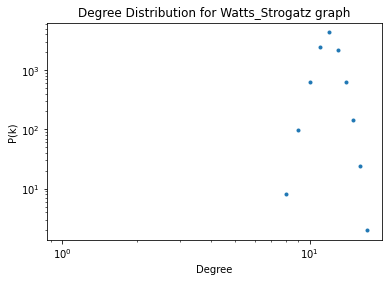

In [9]:
degree_dist(ws_G, "Watts_Strogatz", "WS")

Calculating best minimal value for power law fit
**** Degree Distribution for Watts_Strogatz graph ****


C:\Users\marco\Documents\sna-project-2022_cosmo_d-arrigo_esposito\2 - NetworkAnalysis\net_analysis.py:40: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


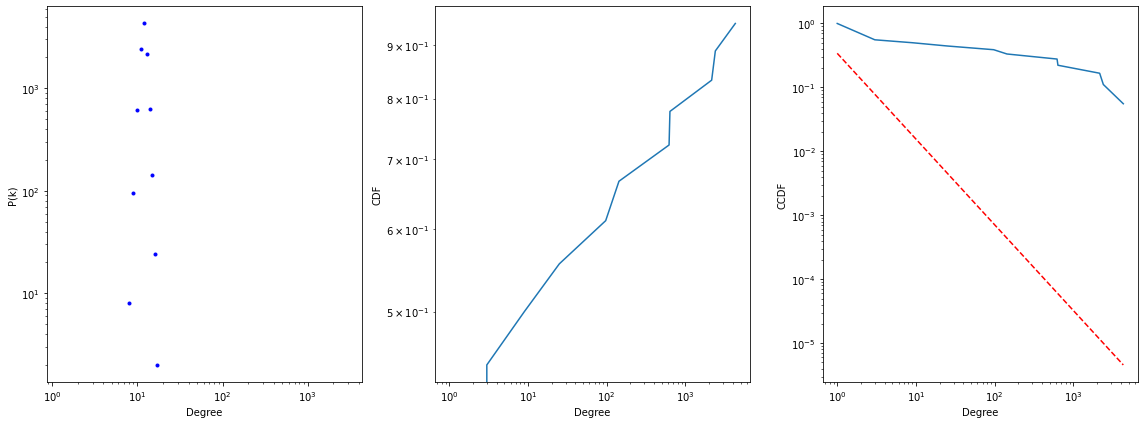

alpha=2.3412076528477517 sigma=0.0804234150404636


In [10]:
plot_dist(ws_G, "Watts_Strogatz", "WS")

In [11]:
info_degree(ws_G, "Watts_Strogatz")

***** Degree info for Watts_Strogatz graph ***
Maximum degree: (17, 9013)
Minimum degree: (8, 864)


# 2 - Connected Components

In [12]:
components = n_connected_components(ws_G, "Watts_Strogatz")

**** Connected components for Watts_Strogatz graph ****
Number of Connected Components for Watts_Strogatz: 1
	 component len = 10361


# 3 - Path Analysis

In [13]:
path_analysis(ws_G, "Watts_Strogatz", components)

***** Path analysis for Watts_Strogatz graph
Diameter for components 0 network Watts_Strogatz: 8
Average shortest path for components 0 network Watts_Strogatz: 5.5412584092634285


# 4 - Clustering Coefficient

In [14]:
name, values = c_coefficient_analysis(ws_G, "Watts_Strogatz")

*** Clustering coefficient analyssi for Watts_Strogatz graph ***
Min: 0.13333333333333333
Max: 0.8214285714285714
Mean: 0.49773174426966643
Stdev: 0.10092839663957356


**** Distribution degree/clustering for Watts_Strogatz graph ***


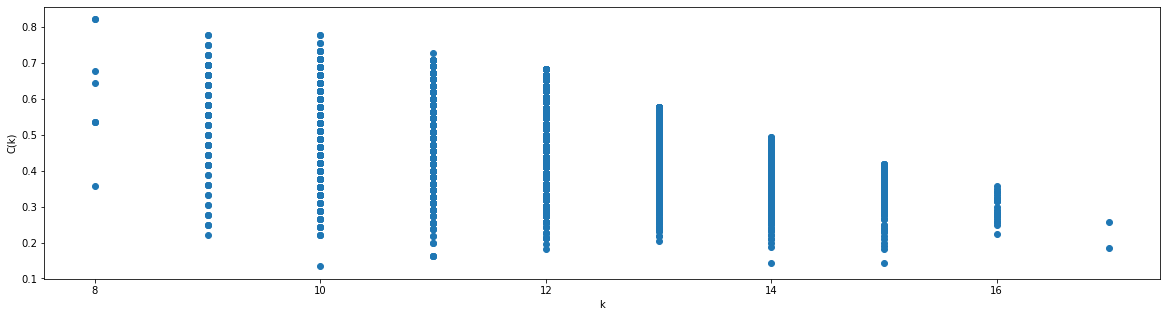

In [15]:
degree_clustering(ws_G, "Watts_Strogatz", "WS")

# 5 - Density Analysis

In [16]:
density_analysis(ws_G, "Watts_Strogatz")

Density for Watts_Strogatz graph: 0.0011583011583011582
